## Please follow the below structure while attempting the hackathon, make sure to submit the jupyter file as well for every submission you are making.

## Please answer the descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation.

## Importing Necessary Libraries

In [945]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [946]:
train=pd.read_csv('Train_Set_TVS.csv')
test=pd.read_csv('Test_Set_TVS.csv')
train.shape,test.shape

((132440, 33), (56760, 32))

In [947]:
combined=pd.concat([train,test],ignore_index=True)

In [948]:
combined.shape

(189200, 33)

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [949]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Compensation        8992
Vehicle_Status     12987
Annuity_amt         6574
density_Ind         7691
Job_Type           14568
Prop_List           2876
Home_Appliances    15723
Credit_Inq          3856
Experience         31196
Income_Alt         10981
Company_Rating     16784
c1_rated           24876
c2_rated           18976
Contact_age        11675
Default            56760
dtype: int64

In [950]:
### Company_Rating

In [951]:
combined.groupby(['Region_Type','Region','Company_Rating']).count()['ID']

Region_Type  Region   Company_Rating
Metro        Central  1.0                3105
                      2.0               20772
                      3.0                4383
             East     1.0                3942
                      2.0               22516
                      3.0                4142
             North    1.0                7179
                      2.0               40893
                      3.0                7920
             South    1.0                2097
                      2.0               19077
                      3.0                3804
Rural        Central  1.0                 558
                      2.0                4661
                      3.0                 818
             East     1.0                 607
                      2.0                4761
                      3.0                 842
             North    1.0                1182
                      2.0                9062
                      3.0                15

In [952]:
combined['Company_Rating']=combined['Company_Rating'].fillna(2)

In [953]:
#As we can see that most companies have a rating of 2 in each region and the regionType thus we can replace the null values with 2.

In [954]:
### Job_Type

In [955]:
combined.groupby(['Company_Rating','Job_Type']).count()['ID']

Company_Rating  Job_Type
1.0             Govt.        3738
                IT           9197
                Non-IT       5014
2.0             Govt.       28186
                IT          73815
                Non-IT      32000
3.0             Govt.        4806
                IT          12762
                Non-IT       5114
Name: ID, dtype: int64

In [956]:
combined['Job_Type']=combined['Job_Type'].fillna('IT')

In [957]:
# The mode of job type in all the Company is IT.

In [958]:
### Prop_List

In [959]:
combined['Prop_List'].mode()

0    One
dtype: object

In [960]:
pd.crosstab(combined['Prop_List'],combined['Region'])

Region,Central,East,North,South
Prop_List,,,,
Morethan_One,8617,9607,11053,7665
None,4902,4797,4971,3931
One,24393,26144,58768,21476


In [961]:
combined['Prop_List']=combined['Prop_List'].replace([np.nan],[combined['Prop_List'].mode()])

In [962]:
# Irrespective of the region most people owe 1 property

In [963]:
### Home_Appliance

In [964]:
pd.crosstab(combined['Prop_List'],combined['Home_Appliances'])

Home_Appliances,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,14.0,19.0
Prop_List,,,,,,,,,,,,,
Morethan_One,33774,0,0,0,42,17,3,2,1,3,2,3,2
None,0,14878,2141,0,0,0,0,0,0,0,0,0,0
One,550,230,32,121796,1,0,0,0,0,0,0,0,0


In [965]:
combined.pivot_table(index='Addr_permanent',columns='Prop_List',values='Home_Appliances',aggfunc='median')

Prop_List,Morethan_One,None,One
Addr_permanent,,,
No,1.0,2.0,4.0
Yes,1.0,2.0,4.0


In [966]:
a=combined[(combined['Prop_List']=='Morethan_One')&(combined['Home_Appliances'].isnull())].index
b=combined[(combined['Prop_List']=='None')&(combined['Home_Appliances'].isnull())].index
c=combined[(combined['Prop_List']=='One')&(combined['Home_Appliances'].isnull())].index

In [967]:
combined.loc[a,'Home_Appliances']=1.0
combined.loc[b,'Home_Appliances']=2.0
combined.loc[c,'Home_Appliances']=4.0

* As we can see that irrespective of them having a permanent address customer with more than 1 property have 1 home appliance ,customer with none have 2 and customer with 1 property have 4 median appliances.

In [968]:
### Compensation

In [969]:
combined.groupby(['Company_Rating','Job_Type']).median()['Compensation']

Company_Rating  Job_Type
1.0             Govt.       875211.0
                IT          867884.0
                Non-IT      997023.0
2.0             Govt.       622635.0
                IT          637840.0
                Non-IT      721350.0
3.0             Govt.       587930.0
                IT          601033.0
                Non-IT      679792.0
Name: Compensation, dtype: float64

In [970]:
a=list(combined[(combined['Company_Rating']==1)&(combined['Job_Type']=='Govt.')&(combined['Compensation'].isnull())].index)
b=list(combined[(combined['Company_Rating']==2)&(combined['Job_Type']=='Govt.')&(combined['Compensation'].isnull())].index)
c=list(combined[(combined['Company_Rating']==3)&(combined['Job_Type']=='Govt.')&(combined['Compensation'].isnull())].index)
d=list(combined[(combined['Company_Rating']==1)&(combined['Job_Type']=='IT')&(combined['Compensation'].isnull())].index)
e=list(combined[(combined['Company_Rating']==2)&(combined['Job_Type']=='IT')&(combined['Compensation'].isnull())].index)
f=list(combined[(combined['Company_Rating']==3)&(combined['Job_Type']=='IT')&(combined['Compensation'].isnull())].index)
g=list(combined[(combined['Company_Rating']==1)&(combined['Job_Type']=='Non-IT')&(combined['Compensation'].isnull())].index)
h=list(combined[(combined['Company_Rating']==2)&(combined['Job_Type']=='Non-IT')&(combined['Compensation'].isnull())].index)
i=list(combined[(combined['Company_Rating']==3)&(combined['Job_Type']=='Non-IT')&(combined['Compensation'].isnull())].index)


In [971]:
combined.loc[a,'Compensation']=875211.0
combined.loc[b,'Compensation']=622635.0
combined.loc[c,'Compensation']=587930.0
combined.loc[d,'Compensation']=867884.0
combined.loc[e,'Compensation']=637840.0
combined.loc[f,'Compensation']=601033.0
combined.loc[g,'Compensation']=997023.0
combined.loc[h,'Compensation']=721350.0
combined.loc[i,'Compensation']=679792.0

In [972]:
### Credit_Inq,c1_rated,c2_rated

In [973]:
combined['Credit_Inq'].mode()

0    1
dtype: object

In [974]:
combined['Credit_Inq']=combined['Credit_Inq'].fillna('1')

In [975]:
combined[['c1_rated','c2_rated']].corr()

,c1_rated,c2_rated
c1_rated,1.0,1.0
c2_rated,1.0,1.0


In [976]:
combined[(combined['c1_rated']!=combined['c2_rated'])&(~combined['c1_rated'].isnull())&(~combined['c2_rated'].isnull())]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default


In [977]:
combined[['c1_rated','c2_rated','Credit_Inq']]

,c1_rated,c2_rated,Credit_Inq
0,0.077,0.077,1
1,0.184,0.184,2
2,0.538,0.538,3
3,NaN,0.561,1
4,NaN,0.200,2
...,...,...,...
189195,0.716,0.716,1
189196,NaN,0.193,1
189197,0.175,0.175,1
189198,0.669,0.669,2


In [978]:
a=combined[combined['c1_rated'].isnull()].index

In [979]:
combined.loc[a,'c1_rated']=combined.loc[a,'c2_rated']

In [980]:
b=combined[combined['c2_rated'].isnull()].index

In [981]:
combined.loc[b,'c2_rated']=combined.loc[b,'c1_rated']

In [982]:
combined.groupby(['Credit_Inq']).median()['c1_rated']

Credit_Inq
1     0.441
2     0.441
3     0.531
>4    0.541
Name: c1_rated, dtype: float64

In [983]:
a=combined[(combined['c1_rated'].isnull())&(combined['Credit_Inq'].isin(['1','2']))].index
b=combined[(combined['c1_rated'].isnull())&(combined['Credit_Inq'].isin(['3','>4']))].index

In [984]:
combined.loc[a,'c1_rated']=0.441
combined.loc[b,'c1_rated']=0.541

* There dosent seem to be any difference between c1 and c2 rated so we can conclude that all the inquiry must be soft inquiries.
* Thus we can drop one of the columns

In [985]:
### Contact_Age

In [986]:
combined['Contact_age'].mean()

977.1631601182931

* The change has been stored and the mean tie is more than a year thus the columns do not have uch significance to us.

In [987]:
### density_Ind

In [988]:
combined['density_Ind']

0         0.0304
1         0.0194
2         0.0118
3         0.0373
4         0.0138
           ...  
189195    0.0050
189196    0.0321
189197    0.0334
189198    0.0052
189199    0.0155
Name: density_Ind, Length: 189200, dtype: float64

In [989]:
combined.pivot_table(values='density_Ind',columns='Dependents',aggfunc='median')

Dependents,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
density_Ind,0.0203,0.0204,0.0203,0.0202,0.0207,0.01925,0.0191,0.0287,0.011


In [990]:
a=combined[(combined['Dependents'].isin([1.0,2.0,3.0,4.0,5.0]))&(combined['density_Ind'].isnull())].index
combined.loc[a,'density_Ind']=0.0204

In [991]:
a=combined[(combined['Dependents'].isin([6.0,7.0]))&(combined['density_Ind'].isnull())].index
combined.loc[a,'density_Ind']=0.01925

* since density is inversely proportional to the no. of dependents we can use the dependent column for the null value treatment.

In [992]:
def a(x):
    if (x>=21.0)&(x<35.0):
        return 'Young'
    if(x>=35.0)&(x<=59.0):
        return 'Experienced'
    if x>59.0:
        return 'Retired'
combined['Age_grp']=combined['Age'].apply(a)

In [993]:
### Experience

In [994]:
combined.pivot_table(values='Experience',index='Job_Type',columns='Age_grp',aggfunc='median')

Age_grp,Experienced,Retired,Young
Job_Type,,,
Govt.,5.5,7.8,3.3
IT,5.5,10.1,3.1
Non-IT,5.6,10.1,3.2


In [995]:
a=combined[(combined['Age_grp']=='Experienced')&(combined['Experience'].isnull())].index
combined.loc[a,'Experience']=5.5

In [996]:
a=combined[(combined['Age_grp']=='Young')&(combined['Experience'].isnull())].index
combined.loc[a,'Experience']=3.2

In [997]:
a=combined[(combined['Age_grp']=='Retired')&(combined['Experience'].isnull())&(combined['Job_Type']=='Govt.')].index
combined.loc[a,'Experience']=7.8

In [998]:
a=combined[(combined['Age_grp']=='Retired')&(combined['Experience'].isnull())].index
combined.loc[a,'Experience']=10.1

In [999]:
### Annuity_amt

In [1000]:
combined.pivot_table(values='Annuity_amt',columns='Age_grp',aggfunc='median')

Age_grp,Experienced,Retired,Young
Annuity_amt,10877.8,10460.09,10659.1


In [1001]:
a=combined[(combined['Age_grp']=='Experienced')&(combined['Annuity_amt'].isnull())].index
b=combined[(combined['Age_grp']=='Retired')&(combined['Annuity_amt'].isnull())].index
c=combined[(combined['Age_grp']=='Young')&(combined['Annuity_amt'].isnull())].index

In [1002]:
combined.loc[a,'Annuity_amt']=10885.55
combined.loc[b,'Annuity_amt']=10460.09
combined.loc[c,'Annuity_amt']=10659.1

In [1003]:
### Vehicle_Status

In [1004]:
pd.crosstab(combined['Region_Type'],combined['Vehicle_Status'])

Vehicle_Status,N,Y
Region_Type,,
Metro,94674,48472
Rural,18840,10702
other,2577,948


In [1005]:
combined['Vehicle_Status'].value_counts()

N    116091
Y     60122
Name: Vehicle_Status, dtype: int64

In [1006]:
combined['Vehicle_Status']=combined['Vehicle_Status'].fillna('N')

* Vehicle status has no absolute relation with a persons income .Thus we can change it with mode

In [1007]:
### Income_Alt

In [1008]:
pd.crosstab(combined['Income_Alt'],combined['Prop_List'],margins=True)

Prop_List,Morethan_One,None,One,All
Income_Alt,,,,
Not_Specified,26012,13002,89275,128289
Y,8790,4576,36564,49930
All,34802,17578,125839,178219


In [1009]:
combined['Income_Alt']=combined['Income_Alt'].fillna('Not_Specified')

* Since the information about alternative source of income is not specified by most of the applicants and it contains null value .
* thus we cannot inferr much from this column ,hence we can drop the column.

In [1010]:
## Verified applicants have a high proportion of not defaulting the loan.

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























In [1011]:
combined[combined['Addr_permanent']=='No']['Default'].value_counts()

0.0    7339
1.0    3003
Name: Default, dtype: int64

In [1012]:
combined.pivot_table(values='Default',index='Addr_permanent',columns='Permanent_Addr_tag',aggfunc='count')

Permanent_Addr_tag,No,Yes
Addr_permanent,,
No,2247,8095
Yes,21577,100521


In [1013]:
cat=combined.select_dtypes(include=np.object_).columns
num=combined.select_dtypes(exclude=np.object_).columns

In [1014]:
len(cat),len(num)

(18, 16)

In [1015]:
### Univariate analysis -Cat

<AxesSubplot:>

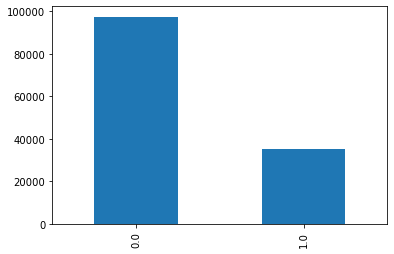

In [1016]:
combined['Default'].value_counts().plot(kind='bar')

In [1017]:
## The target classes are not balanced .
##Thus we will have to perform smote to avoid accuracy paradox

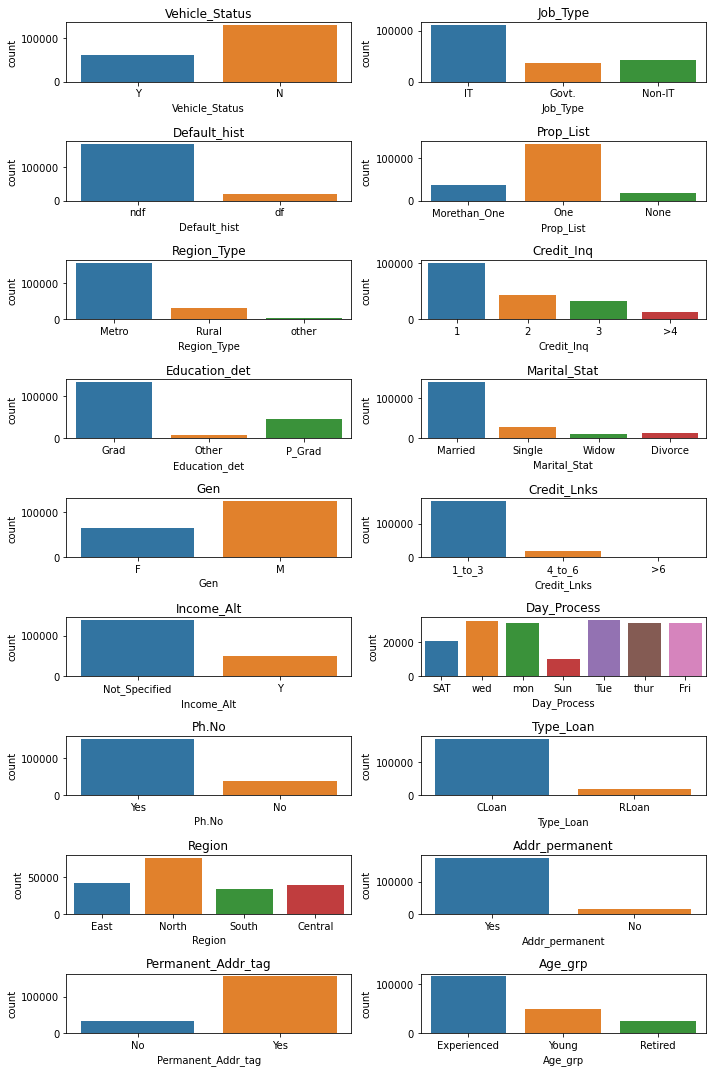

In [1018]:
plt.figure(figsize=[10,15])
a=9
b=2
c=1
for i in cat:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.countplot(combined.loc[:,i])
    c+=1
plt.tight_layout()
plt.show()

* The day process column shows that most of the applications are processed on weekdays so we can change the values to weekday and weekend.

In [1019]:
a=combined[combined['Day_Process'].isin(['SAT','Sun'])].index
b=combined[~(combined['Day_Process'].isin(['SAT','Sun']))].index
combined.loc[a,'Day_Process']='Weekend'
combined.loc[b,'Day_Process']='Weekday'

<AxesSubplot:xlabel='Day_Process', ylabel='count'>

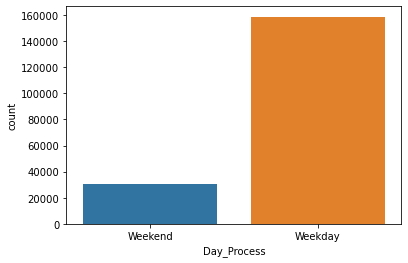

In [1020]:
sns.countplot(combined['Day_Process'])

In [1021]:
##Numeric

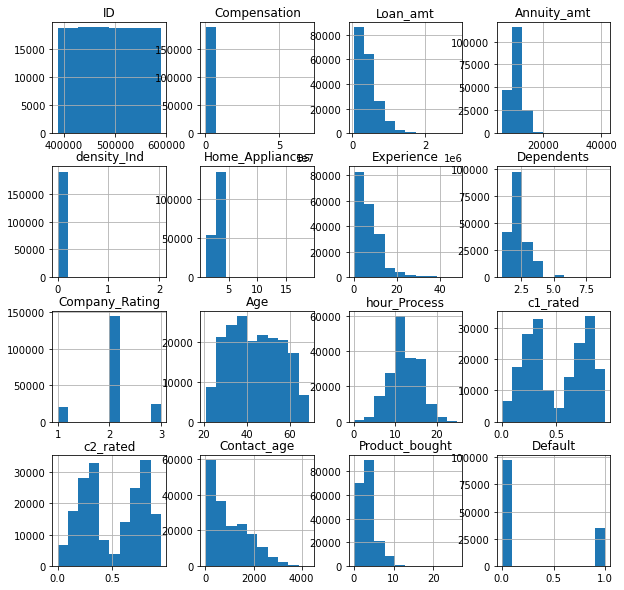

In [1022]:
combined.hist(figsize=[10,10])
plt.show()

<AxesSubplot:>

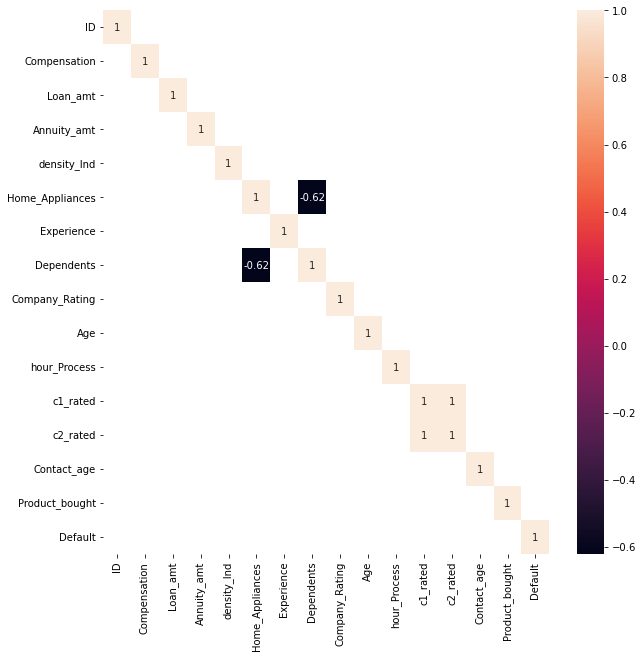

In [1023]:
plt.figure(figsize=[10,10])
sns.heatmap(combined.corr()[abs(combined.corr())>0.5],annot=True)

In [1024]:
# We can say that the independent variables are not correlated to each other except for density index and dependents.

In [1025]:
pd.crosstab(combined['Marital_Stat'],combined['Dependents'])

Dependents,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Marital_Stat,,,,,,,,,
Divorce,8337,2838,797,133,10,3,0,0,0
Married,1466,89907,30608,14861,2186,247,40,16,3
Single,23160,3887,768,159,19,5,1,0,0
Widow,8713,772,184,71,4,3,1,1,0


* We can see that only Married applicants tend to have more than 2 or more dependents whereas the others mostly have only 1 or2 dependents.

In [1026]:
combined.groupby('Marital_Stat').count()['Dependents']

Marital_Stat
Divorce     12118
Married    139334
Single      27999
Widow        9749
Name: Dependents, dtype: int64

In [1027]:
## Bivariate

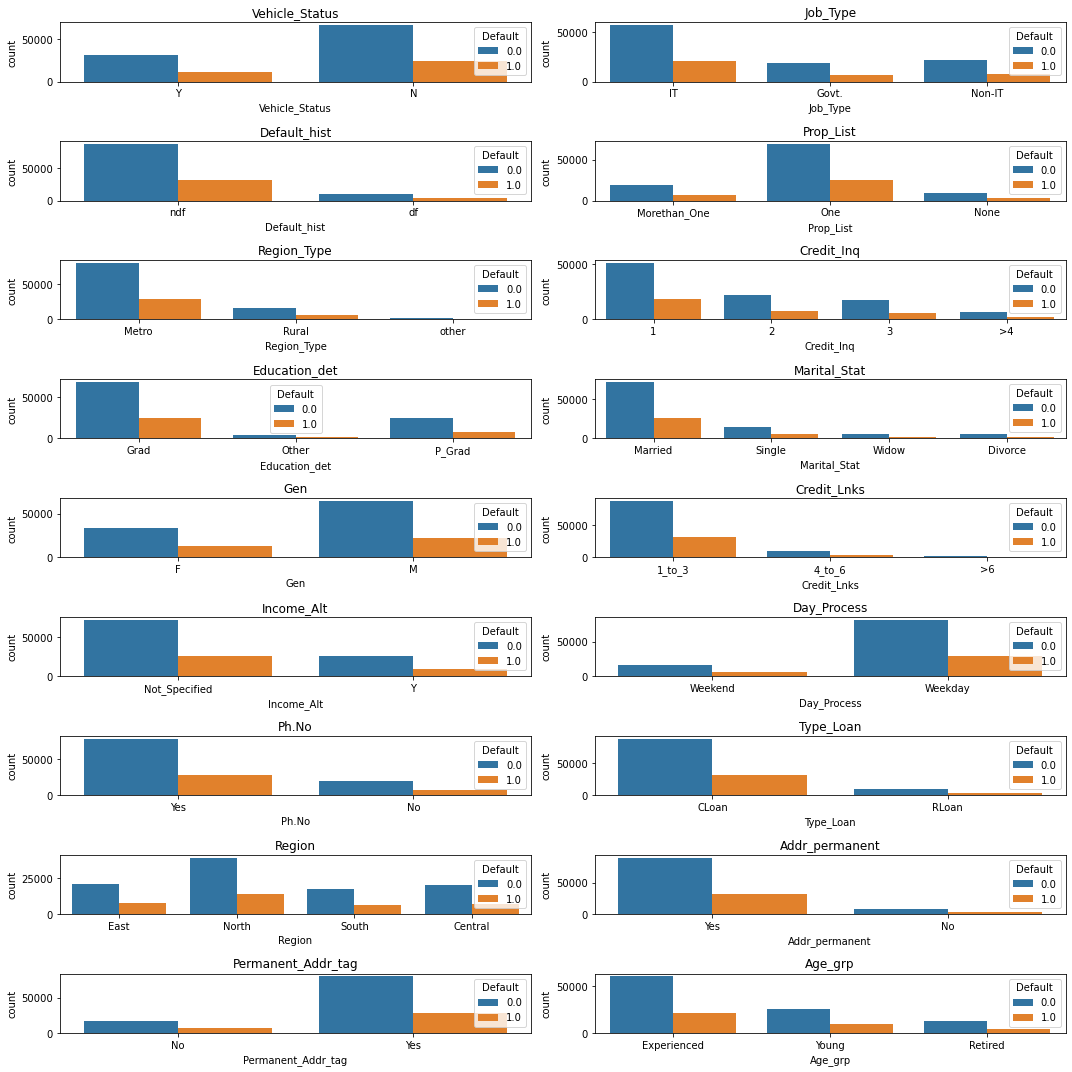

In [1028]:
plt.figure(figsize=[15,15])
a=9
b=2
c=1
for i in cat:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.countplot(combined.loc[:,i],hue=combined['Default'])
    c+=1
plt.tight_layout()
plt.show()

In [1029]:
combined.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default',
       'Age_grp'],
      dtype='object')

In [1030]:
comb=combined.drop(['Income_Alt','c2_rated','ID','Contact_age','Age'],axis=1)

In [1031]:
comb.shape,combined.shape

((189200, 29), (189200, 34))

In [1032]:
new_train=comb.iloc[0:train.shape[0]]
new_test=comb.iloc[train.shape[0]:]
new_test=new_test.drop('Default',axis=1)

In [1033]:
new_train.shape,new_test.shape

((132440, 29), (56760, 28))

In [1034]:
train.shape,test.shape

((132440, 33), (56760, 32))

In [1035]:
### Outliers

In [1036]:
col=new_train.select_dtypes(include=np.number).columns
col

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating',
       'hour_Process', 'c1_rated', 'Product_bought', 'Default'],
      dtype='object')

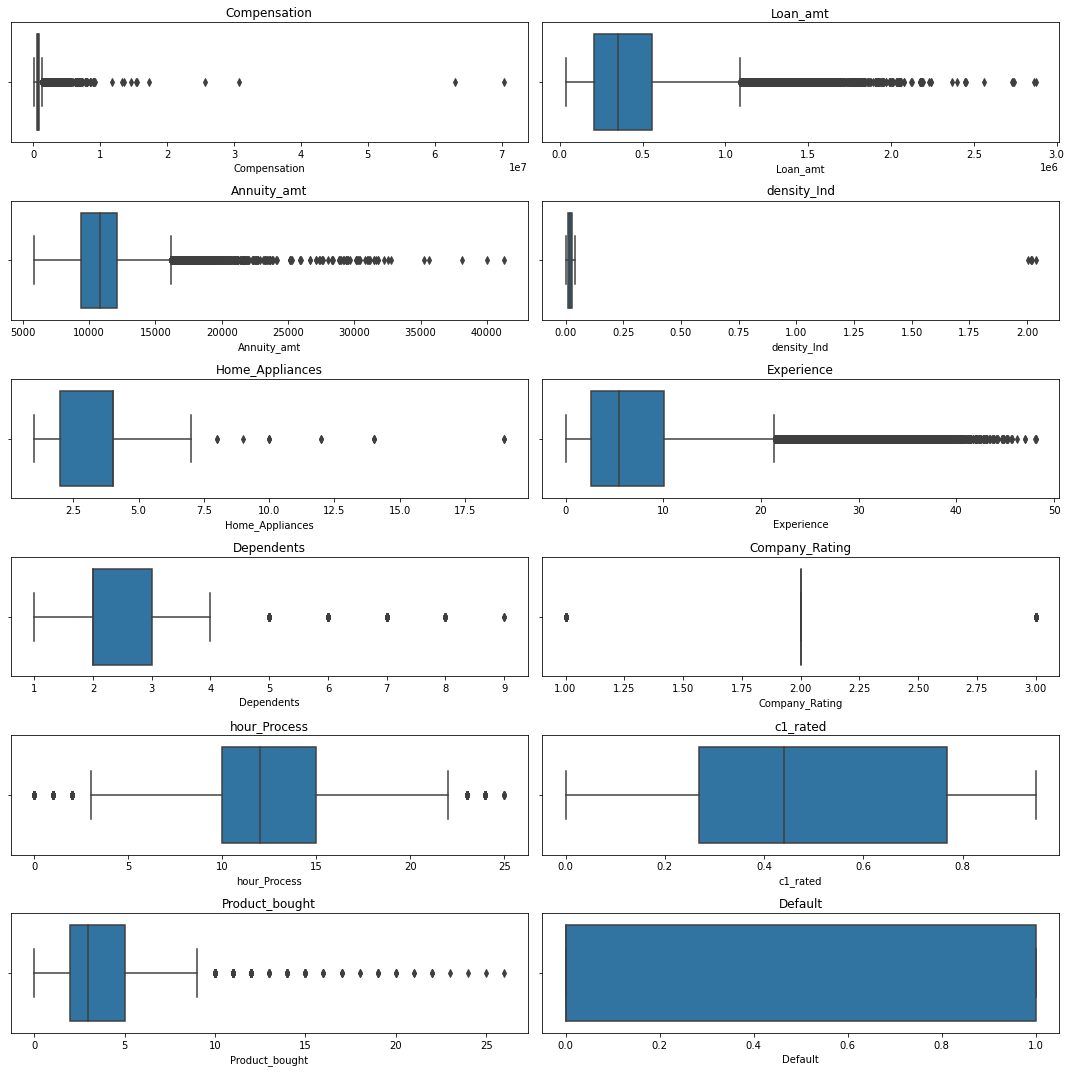

In [1037]:
plt.figure(figsize=[15,15])
a=6
b=2
c=1
for i in col:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.boxplot(combined.loc[:,i])
    c+=1
plt.tight_layout()
plt.show()

In [1038]:
new=pd.get_dummies(new_train,drop_first=True)
test_new=pd.get_dummies(new_test,drop_first=True)
new.shape,test_new.shape

((132440, 41), (56760, 40))

In [1039]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [1040]:
rs=RobustScaler()
new_Train=pd.DataFrame(rs.fit_transform(new),columns=new.columns)
new_Train.shape

(132440, 41)

In [1041]:
new_Train.head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,hour_Process,c1_rated,...,Day_Process_Weekend,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes,Age_grp_Retired,Age_grp_Young
0,0.415187,0.872263,1.117170,0.520833,-1.5,-0.605263,1.0,0.0,-0.4,-0.729459,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,0.655477,-0.428267,0.139006,-0.052083,-1.5,-0.328947,1.0,-1.0,0.0,-0.515030,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.095096,-0.702584,-0.890666,-0.447917,0.0,0.000000,0.0,1.0,-1.4,0.194389,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.926620,-0.482178,-1.337024,0.880208,-1.0,-0.105263,2.0,0.0,0.0,0.240481,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.751362,0.633837,0.893763,-0.343750,-1.5,0.184211,1.0,-1.0,0.8,-0.482966,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [1042]:
from sklearn.model_selection import train_test_split

In [1043]:
X=new_Train.drop('Default',axis=1)
y=new_Train['Default']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [1044]:
ytrain.value_counts()

0.0    68181
1.0    24527
Name: Default, dtype: int64

In [1045]:
## SMOTE

In [1046]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=123)
new_x,new_y=sm.fit_resample(xtrain,ytrain)

In [1047]:
new_y.value_counts()

0.0    68181
1.0    68181
Name: Default, dtype: int64

In [1048]:
## Now the data have balanced classes

## 3 Model Building

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [1049]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

## Model 1

In [1050]:
xg=XGBClassifier()
model=xg.fit(new_x,new_y)
# pred=model.predict(xtest)
# print(classification_report(pred,ytest))


In [1051]:
pred=model.predict(new_x)
print(classification_report(pred,new_y))


              precision    recall  f1-score   support

           0       1.00      0.74      0.85     92066
           1       0.65      1.00      0.79     44296

    accuracy                           0.82    136362
   macro avg       0.82      0.87      0.82    136362
weighted avg       0.89      0.82      0.83    136362



In [1052]:
pred=pd.Series(model.predict(test_new))
test_pred=pd.concat([test['ID'],pred],axis=1)
test_pred.index=test_new.index
test_pred.rename({0:'Default'},axis=1,inplace=True)

In [1053]:
test_pred['Default'].value_counts()

1    29493
0    27267
Name: Default, dtype: int64

In [1054]:
test_pred.to_csv('submission.csv',index=False)

## Model 2 

In [1092]:
from sklearn.model_selection import GridSearchCV,KFold
param={'criterion': ['friedman_mse', 'squared_error', 'mse']}
k=KFold(n_splits=3,shuffle=True,random_state=123)
g=GridSearchCV(estimator=gb,param_grid=param,scoring='neg_log_loss',n_jobs=1,cv=k)
mod=g.fit(new_x,new_y)
print(mod.best_params_,mod.best_score_)

{'criterion': 'friedman_mse'} -0.43162475439456416


In [1096]:

gb=GradientBoostingClassifier(learning_rate=0.5,loss='exponential',criterion='friedman_mse',random_state=1)
model=gb.fit(new_x,new_y)
pred=model.predict(xtest)
print(classification_report(pred,ytest))


              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     39658
         1.0       0.00      0.27      0.00        74

    accuracy                           0.74     39732
   macro avg       0.50      0.50      0.43     39732
weighted avg       1.00      0.74      0.85     39732



In [1088]:
pred=model.predict(new_x)
print(classification_report(pred,new_y))


              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     93405
         1.0       0.63      1.00      0.77     42957

    accuracy                           0.81    136362
   macro avg       0.81      0.86      0.81    136362
weighted avg       0.88      0.81      0.82    136362



In [1097]:
pred=pd.Series(model.predict(test_new))
test_pred=pd.concat([test['ID'],pred],axis=1)
test_pred.index=test_new.index
test_pred.rename({0:'Default'},axis=1,inplace=True)

In [1098]:
test_pred['Default'].value_counts()

1.0    41662
0.0    15098
Name: Default, dtype: int64

In [1099]:
test_pred.to_csv('submission3.csv',index=False)

## Model 3

In [1061]:
from sklearn.model_selection import GridSearchCV,KFold
param={'learning_rate':[0.05,0.07,0.1,0.3,0.4,0.5,0.6,0.7,0.8]}
k=KFold(n_splits=3,shuffle=True,random_state=123)
g=GridSearchCV(estimator=xg,param_grid=param,scoring='neg_log_loss',n_jobs=1,cv=k)
mod=g.fit(new_x,new_y)
print(mod.best_params_,mod.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
param={'learning_rate':[0.05,0.07,0.1,0.3,0.4,0.5,0.6,0.7,0.8]}
k=KFold(n_splits=3,shuffle=True,random_state=123)
g=GridSearchCV(estimator=xg,param_grid=param,scoring='f1',n_jobs=1,cv=k)
mod=g.fit(new_x,new_y)
print(mod.best_params_,mod.best_score_)

In [1062]:
xg=XGBClassifier(learning_rate=0.1)
model=xg.fit(new_x,new_y)
pred=model.predict(xtest)
print(classification_report(pred,ytest))


              precision    recall  f1-score   support

           0       1.00      0.74      0.85     39726
           1       0.00      0.33      0.00         6

    accuracy                           0.74     39732
   macro avg       0.50      0.53      0.42     39732
weighted avg       1.00      0.74      0.85     39732



In [1063]:
pred=model.predict(new_x)
print(classification_report(pred,new_y))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85     92999
           1       0.64      1.00      0.78     43363

    accuracy                           0.82    136362
   macro avg       0.82      0.87      0.81    136362
weighted avg       0.88      0.82      0.82    136362



In [1064]:
pred=pd.Series(model.predict(test_new))
test_pred=pd.concat([test['ID'],pred],axis=1)
test_pred.index=test_new.index
test_pred.rename({0:'Default'},axis=1,inplace=True)

In [1065]:
test_pred['Default'].value_counts()

0    55792
1      968
Name: Default, dtype: int64

In [1066]:
test_pred.to_csv('submission2.csv',index=False)

In [1067]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(random_state=1)
model=ad.fit(new_x,new_y)
pred=model.predict(xtest)
print(classification_report(pred,ytest))


              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75     30887
         1.0       0.22      0.26      0.24      8845

    accuracy                           0.63     39732
   macro avg       0.50      0.50      0.50     39732
weighted avg       0.65      0.63      0.64     39732



In [1068]:
pred=pd.Series(model.predict(test_new))
test_pred=pd.concat([test['ID'],pred],axis=1)
test_pred.index=test_new.index
test_pred.rename({0:'Default'},axis=1,inplace=True)
test_pred['Default'].value_counts()

0.0    32223
1.0    24537
Name: Default, dtype: int64

In [1069]:
test_pred.to_csv('submission4.csv',index=False)

In [1074]:
param={'n_estimators':range(10,41),'learning_rate':[0.05,0.07,0.1,0.3,0.4,0.5,0.6,0.7,0.8]}
k=KFold(n_splits=3,shuffle=True,random_state=123)
g=GridSearchCV(estimator=ad,param_grid=param,scoring='neg_log_loss',n_jobs=1,cv=k)
mod=g.fit(new_x,new_y)
print(mod.best_params_,mod.best_score_)

{'learning_rate': 0.05, 'n_estimators': 11} -0.687093713148569


In [1075]:
ad=AdaBoostClassifier(learning_rate=0.05,n_estimators=11,random_state=1)
model=ad.fit(new_x,new_y)
pred=model.predict(xtest)
print(classification_report(pred,ytest))


              precision    recall  f1-score   support

         0.0       0.42      0.74      0.54     16630
         1.0       0.59      0.27      0.37     23102

    accuracy                           0.47     39732
   macro avg       0.51      0.51      0.46     39732
weighted avg       0.52      0.47      0.44     39732



In [1076]:
pred=pd.Series(model.predict(test_new))
test_pred=pd.concat([test['ID'],pred],axis=1)
test_pred.index=test_new.index
test_pred.rename({0:'Default'},axis=1,inplace=True)
test_pred['Default'].value_counts()

1.0    41622
0.0    15138
Name: Default, dtype: int64

In [1077]:
test_pred.to_csv('submission4.csv',index=False)